(a) Computed Otsu threshold t* = 105

(b) Small binary mask preview (top-left 10x10):
 [[1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


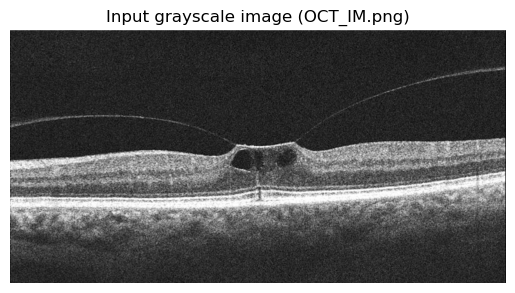

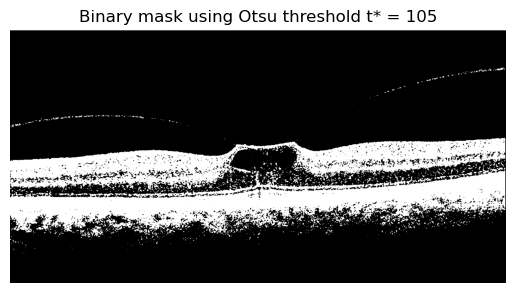

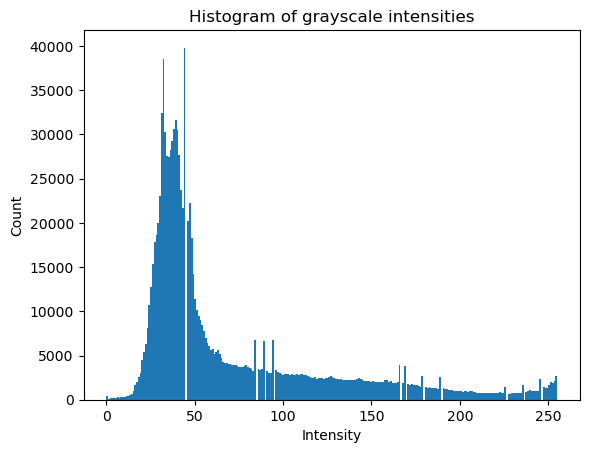


(c) Interpretation (3–5 sentences):
Otsu’s method works best when the grayscale histogram is roughly bimodal, so one global threshold separates background and foreground.
For this OCT image, we often see a darker background and brighter tissue structures, which can produce a partially bimodal histogram.
A likely failure mode is speckle noise and uneven brightness, which can blur the two peaks and shift the chosen threshold.
If multiple tissue layers create more than two intensity modes, a single Otsu threshold may segment poorly; local/adaptive thresholding may work better.


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# ASSIGNMENT: Otsu implementation + interpretation
# Image used : OCT_IM.png
# ============================================================
IMG_PATH = r"C:\Users\kozzj\Documents\UofL\BE530\Medical Data Samples\OCT_IM.png"

# ----------------------------
# 1) Load image
# ----------------------------
img = plt.imread(IMG_PATH)

# ----------------------------
# 2) Convert to grayscale if RGB/RGBA
# ----------------------------
if img.ndim == 3:
    img = img[..., :3] # drop alpha if present
img = 0.299 * img[..., 0] + 0.587 * img[..., 1] + 0.114 * img[..., 2]

# ----------------------------
# 3) Convert to uint8 [0..255]
# ----------------------------
if img.dtype != np.uint8:
    if img.max() <= 1.0:
        img = img * 255.0
img = np.clip(img, 0, 255).astype(np.uint8)

# ----------------------------
# 4) Otsu threshold (from scratch)
# ----------------------------
def otsu_threshold_uint8(img_uint8):
    pixels = img_uint8.ravel()
    hist = np.bincount(pixels, minlength=256).astype(np.float64)
    p = hist / hist.sum()
    r = np.arange(256, dtype=np.float64) # intensity values
    w0 = np.cumsum(p) # class 0 probabilities
    w1 = 1.0 - w0 # class 1 probabilities
    mu = np.cumsum(p * r) # cumulative mean
    mu_T = mu[-1] # global mean

# Between-class variance (handle divide-by-zero safely)
    sigma_b2 = np.zeros(256, dtype=np.float64)
    valid = (w0 > 0) & (w1 > 0)
    mu0 = mu[valid] / w0[valid]
    mu1 = (mu_T - mu[valid]) / w1[valid]
    sigma_b2[valid] = w0[valid] * w1[valid] * (mu0 - mu1) ** 2

    return int(np.argmax(sigma_b2))

t_star = otsu_threshold_uint8(img)

# ----------------------------
# 5) Binary mask
# ----------------------------
mask = (img >= t_star).astype(np.uint8)

# ----------------------------
# (a) Report threshold
# ----------------------------
print("(a) Computed Otsu threshold t* =", t_star)

# ----------------------------
# (b) Show mask + small array preview
# ----------------------------
print("\n(b) Small binary mask preview (top-left 10x10):\n", mask[:10, :10])

plt.figure()
plt.imshow(img, cmap="gray")
plt.title("Input grayscale image (OCT_IM.png)")
plt.axis("off")
plt.show()

plt.figure()
plt.imshow(mask, cmap="gray")
plt.title(f"Binary mask using Otsu threshold t* = {t_star}")
plt.axis("off")
plt.show()

# Histogram (helps for part c)
plt.figure()
plt.hist(img.ravel(), bins=256, range=(0, 255))
plt.title("Histogram of grayscale intensities")
plt.xlabel("Intensity")
plt.ylabel("Count")
plt.show()

# ----------------------------
# (c) 3–5 sentences interpretation
# ----------------------------
print("\n(c) Interpretation (3–5 sentences):")
print("Otsu’s method works best when the grayscale histogram is roughly bimodal, so one global threshold separates background and foreground.")
print("For this OCT image, we often see a darker background and brighter tissue structures, which can produce a partially bimodal histogram.")
print("A likely failure mode is speckle noise and uneven brightness, which can blur the two peaks and shift the chosen threshold.")
print("If multiple tissue layers create more than two intensity modes, a single Otsu threshold may segment poorly; local/adaptive thresholding may work better.")